<b></center><h1>🤖⚽who will  win the premier league with data mining ?⚽🤖</b></center></h1>

<h3 style="text-align:right">
réalisé par : Achraf Sbai et Mohammed Badague
</h3>

## Data Extraction

In [1]:
import pandas as pd
import os

import json


This code cell reads multiple JSON files containing data on English Premier League football matches and creates a pandas DataFrame object for each file. The resulting DataFrame objects are appended to a list for further analysis.

In [2]:
json_files = [file for file in os.listdir("./") if file.endswith('.json')]
json_files.remove('data.json')
json_files.remove('whoscored.json')
df_list = []
for file in json_files:
    print(file)
    json_path = os.path.join("./", file)
    data = json.load(open(json_path, 'r'))
    df = pd.DataFrame(data)
    df_list.append(df)

2458.json
2935.json
3389.json
3853.json
4311.json
5826.json
6335.json
6829.json
7361.json
7811.json
8228.json
8618.json
9075.json


In [3]:
df_list[0]

,home_team,away_team,home_goals,away_goals,home_shots,away_shots,home_possesion,away_possesion,home_pass_success,away_pass_success,home_dribbles,away_dribbles,home_aerials_won,away_aerials_won,home_tackles,away_tackles,home_corners,away_corners,home_dispossessed,away_dispossessed
0,Birmingham,Wolverhampton,1,1,8,11,42.9,57.1,61,71,3,3,26,18,15,11,0,2,9,10
1,Liverpool,Newcastle,3,0,14,11,46.3,53.7,78,85,12,9,8,12,26,7,3,12,4,11
2,Arsenal,Manchester United,1,0,10,12,54.9,45.1,82,76,8,6,18,11,22,25,3,6,20,16
3,Manchester City,West Ham,2,1,21,9,59.8,40.2,86,73,6,0,6,8,19,17,9,5,12,15
4,Everton,Manchester City,2,1,11,12,48.6,51.4,72,79,1,6,9,14,19,16,11,6,13,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Manchester United,West Ham,3,0,21,8,60.3,39.7,88,84,9,9,5,4,31,24,9,3,13,15
376,Bolton,Birmingham,2,2,15,9,50.8,49.2,71,58,5,5,22,9,24,17,6,1,16,15
377,Liverpool,West Bromwich,1,0,11,16,51,49,76,76,3,8,6,14,26,24,7,6,12,21
378,Sunderland,Manchester City,1,0,18,10,41.7,58.3,72,81,11,9,7,12,33,29,3,8,9,20


The resulting output shows that there are no missing values in any of the columns, as indicated by the 0 values for each column.

In [4]:
df_list[0].isna().sum()

home_team            0
away_team            0
home_goals           0
away_goals           0
home_shots           0
away_shots           0
home_possesion       0
away_possesion       0
home_pass_success    0
away_pass_success    0
home_dribbles        0
away_dribbles        0
home_aerials_won     0
away_aerials_won     0
home_tackles         0
away_tackles         0
home_corners         0
away_corners         0
home_dispossessed    0
away_dispossessed    0
dtype: int64

## Data Preprocessing


The output shows that there are no missing values or duplicates in the first 8 DataFrames. However, the 9th DataFrame has missing values, while the 10th DataFrame has duplicated rows

In [5]:
for i,df in enumerate(df_list):
    print(f"{i}:",df.isna().any().any(),df.duplicated().any().any())


0: False False
1: False False
2: False False
3: False False
4: False False
5: False False
6: False False
7: False False
8: False False
9: True False
10: False True
11: False False
12: False False


In [6]:
df_list[9].isna().sum()

home_team            0
away_team            0
home_goals           0
away_goals           0
home_shots           5
away_shots           5
home_possesion       5
away_possesion       5
home_pass_success    5
away_pass_success    5
home_dribbles        5
away_dribbles        5
home_aerials_won     5
away_aerials_won     5
home_tackles         5
away_tackles         5
home_corners         5
away_corners         5
home_dispossessed    5
away_dispossessed    5
dtype: int64

to fill the missing values we used  for the columns that involve counting, such as shots or dribbles, the code first determines the team associated with the missing value and computes the mean value for that team in the corresponding column. For columns involving percentages, such as possession or pass success, the code directly computes the mean value for the team in the corresponding column.

In [7]:
df  = df_list[9]
null_rows = df.isnull().any(axis=1)
null_rows_index = null_rows[null_rows == True].index
for i in null_rows_index:
    for col in ['home_shots','away_shots',  'home_dribbles', 'away_dribbles','home_aerials_won', 'away_aerials_won', 'home_tackles', 'away_tackles','home_corners', 'away_corners', 'home_dispossessed','away_dispossessed']:
         team_col = col.split('_')[0] + '_team'
         team = df.loc[i,:][team_col]
         v = int(df[df[team_col]==team][col].astype(float).mean())
         df.loc[i,:][col]= v

for i in null_rows_index:
    for col in ['home_possesion', 'away_possesion', 'home_pass_success','away_pass_success']:
         team_col = col.split('_')[0] + '_team'
         team = df.loc[i,:][team_col]
         v = df[df[team_col]==team][col].astype(float).mean()
         df.loc[i,:][col]= v

df_list[9]=df

for the 10th df we just drop the duplicated rows

In [8]:
df_list[10].drop_duplicates(inplace=True)
df_list[10].reset_index(drop=True,inplace=True)




There are values that need to be converted to integers and floats as we can see all columns are strings

In [9]:
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   home_team          380 non-null    object
 1   away_team          380 non-null    object
 2   home_goals         380 non-null    object
 3   away_goals         380 non-null    object
 4   home_shots         380 non-null    object
 5   away_shots         380 non-null    object
 6   home_possesion     380 non-null    object
 7   away_possesion     380 non-null    object
 8   home_pass_success  380 non-null    object
 9   away_pass_success  380 non-null    object
 10  home_dribbles      380 non-null    object
 11  away_dribbles      380 non-null    object
 12  home_aerials_won   380 non-null    object
 13  away_aerials_won   380 non-null    object
 14  home_tackles       380 non-null    object
 15  away_tackles       380 non-null    object
 16  home_corners       380 non-null    object
 1

In [10]:
def to_flt(cols,df):
    df[cols]=df[cols].astype('float')
def to_int(cols,df):
    df[cols]=df[cols].astype('int')

int_cols = ['home_goals','away_goals','home_shots','away_shots',  'home_dribbles', 'away_dribbles','home_aerials_won', 'away_aerials_won', 'home_tackles', 'away_tackles','home_corners', 'away_corners', 'home_dispossessed','away_dispossessed']
float_cols = ['home_possesion','away_possesion','home_pass_success','away_pass_success']
for df in df_list:
    to_int(int_cols,df)
    to_flt(float_cols,df)


after the transformation

In [11]:
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   home_team          380 non-null    object 
 1   away_team          380 non-null    object 
 2   home_goals         380 non-null    int32  
 3   away_goals         380 non-null    int32  
 4   home_shots         380 non-null    int32  
 5   away_shots         380 non-null    int32  
 6   home_possesion     380 non-null    float64
 7   away_possesion     380 non-null    float64
 8   home_pass_success  380 non-null    float64
 9   away_pass_success  380 non-null    float64
 10  home_dribbles      380 non-null    int32  
 11  away_dribbles      380 non-null    int32  
 12  home_aerials_won   380 non-null    int32  
 13  away_aerials_won   380 non-null    int32  
 14  home_tackles       380 non-null    int32  
 15  away_tackles       380 non-null    int32  
 16  home_corners       380 non

Now we identify the season for every game in the dfs

In [12]:
for i , df in enumerate(df_list):
    df["season"] = f"{i+2010}-{2010+i+1}"

In [13]:
df_list[0]

,home_team,away_team,home_goals,away_goals,home_shots,away_shots,home_possesion,away_possesion,home_pass_success,away_pass_success,...,away_dribbles,home_aerials_won,away_aerials_won,home_tackles,away_tackles,home_corners,away_corners,home_dispossessed,away_dispossessed,season
0,Birmingham,Wolverhampton,1,1,8,11,42.9,57.1,61.0,71.0,...,3,26,18,15,11,0,2,9,10,2010-2011
1,Liverpool,Newcastle,3,0,14,11,46.3,53.7,78.0,85.0,...,9,8,12,26,7,3,12,4,11,2010-2011
2,Arsenal,Manchester United,1,0,10,12,54.9,45.1,82.0,76.0,...,6,18,11,22,25,3,6,20,16,2010-2011
3,Manchester City,West Ham,2,1,21,9,59.8,40.2,86.0,73.0,...,0,6,8,19,17,9,5,12,15,2010-2011
4,Everton,Manchester City,2,1,11,12,48.6,51.4,72.0,79.0,...,6,9,14,19,16,11,6,13,15,2010-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Manchester United,West Ham,3,0,21,8,60.3,39.7,88.0,84.0,...,9,5,4,31,24,9,3,13,15,2010-2011
376,Bolton,Birmingham,2,2,15,9,50.8,49.2,71.0,58.0,...,5,22,9,24,17,6,1,16,15,2010-2011
377,Liverpool,West Bromwich,1,0,11,16,51.0,49.0,76.0,76.0,...,8,6,14,26,24,7,6,12,21,2010-2011
378,Sunderland,Manchester City,1,0,18,10,41.7,58.3,72.0,81.0,...,9,7,12,33,29,3,8,9,20,2010-2011


For better analysis we concatenate all dfs into one data frame

In [14]:
df=pd.concat(df_list)

In [15]:
df.reset_index(drop=True,inplace=True)
df

,home_team,away_team,home_goals,away_goals,home_shots,away_shots,home_possesion,away_possesion,home_pass_success,away_pass_success,...,away_dribbles,home_aerials_won,away_aerials_won,home_tackles,away_tackles,home_corners,away_corners,home_dispossessed,away_dispossessed,season
0,Birmingham,Wolverhampton,1,1,8,11,42.9,57.1,61.0,71.0,...,3,26,18,15,11,0,2,9,10,2010-2011
1,Liverpool,Newcastle,3,0,14,11,46.3,53.7,78.0,85.0,...,9,8,12,26,7,3,12,4,11,2010-2011
2,Arsenal,Manchester United,1,0,10,12,54.9,45.1,82.0,76.0,...,6,18,11,22,25,3,6,20,16,2010-2011
3,Manchester City,West Ham,2,1,21,9,59.8,40.2,86.0,73.0,...,0,6,8,19,17,9,5,12,15,2010-2011
4,Everton,Manchester City,2,1,11,12,48.6,51.4,72.0,79.0,...,6,9,14,19,16,11,6,13,15,2010-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,Manchester City,Nottingham Forest,6,0,17,8,74.9,25.1,92.0,74.0,...,6,17,8,13,14,10,1,4,7,2022-2023
4787,Arsenal,Aston Villa,2,1,22,4,58.9,41.1,85.0,77.0,...,5,11,10,10,16,10,3,9,6,2022-2023
4788,Bournemouth,Wolverhampton,0,0,5,17,34.1,65.9,74.0,89.0,...,4,12,14,24,26,2,5,13,15,2022-2023
4789,West Ham,Tottenham,1,1,14,12,38.3,61.7,83.0,89.0,...,5,18,10,13,7,3,4,1,9,2022-2023


here we add a column for the result of the game 

In [16]:
df["result"] = df.apply(lambda df : "W" if df["home_goals"]>df["away_goals"] else("L" if df["home_goals"]<df["away_goals"] else "D"),axis = 1)

In [17]:
ovr_df = df.copy(deep = True)

## Data Analysis

### Goals per season

In [18]:
import plotly.express as px
goals_per_season = df.groupby('season')['home_goals', 'away_goals'].sum().reset_index()
goals_per_season['total_goals'] = goals_per_season['home_goals'] + goals_per_season['away_goals']

# create a bar chart of goals per season using plotly
fig = px.bar(goals_per_season, x='season', y='total_goals',
             title='Number of goals per season',
             labels={'total_goals': 'Total Goals'},
             color='total_goals')
fig.show()

C:\Users\PC2\AppData\Local\Temp/ipykernel_8724/673946050.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  goals_per_season = df.groupby('season')['home_goals', 'away_goals'].sum().reset_index()


we can see that on average the premier league sustain the same goals per season with 2019 season being in the lead , the 2023 season is low because its not done yet

### Effeciency

#### Overall

In [19]:

def agg_shots(df):
    teams = pd.concat([df['home_team'], df['away_team']]).unique()
    shots = {team :{"shots":0,"goals":0} for team in teams}
    for i , row in df.iterrows():
        home = row['home_team']
        away = row['away_team']
        if home in shots :
            shots[home]["shots"] +=row["home_shots"]
            shots[home]["goals"] +=row["home_goals"]
        else : 
            shots[home]["shots"] = row['home_shots']
            shots[home]["goals"] =row["home_goals"]
        if  away in shots :
            shots[away]["shots"] +=row["away_shots"]
            shots[away]["goals"]+=row["away_goals"]
        else : 
            shots[home] = row['away_shots']
            shots[away]["games"]=row["away_goals"]
        
    return shots

shots  = pd.DataFrame.from_dict(agg_shots(df),orient="index")
shots['Goals per Shot'] = shots['goals'] / shots['shots']



    

In [20]:

# Create scatter plot
fig = px.scatter(shots, x='goals', y='shots', color='Goals per Shot', size='Goals per Shot', labels={'goals': 'Goals Scored', 'shots': 'Shots Taken'})

# Set axis labels
shots = shots.sort_values("Goals per Shot",ascending=False) 
fig.update_xaxes(title_text='Goals Scored')
fig.update_yaxes(title_text='Shots Taken')
top_teams = shots.index[:5]  
top_shots = shots.loc[top_teams]
for i, team in enumerate(top_teams):
    fig.add_annotation(x=top_shots.loc[team, 'goals'], y=top_shots.loc[team, 'shots'],
                       text=team, showarrow=False, font=dict(size=16))

# Show plot
fig.show()

we can see that man city and Manchester City has the highest Goals per shot with a high number of goals, which explains why it was winning so many titles in recent years , surprisingly Brentford is in the top 5 which shows that its efficient even though it does not score a lot of goals

### Per season

In [21]:
def scatter(df,i):
    shots  = pd.DataFrame.from_dict(agg_shots(df),orient="index")
    shots['Goals per Shot'] = shots['goals'] / shots['shots']
    shots["season"] = i+2011
    return shots
dfs  = [scatter(df,i) for i, df in enumerate(df_list)]

In [22]:
import plotly.graph_objs as go

# assuming you have a list of data frames called dfs, each representing a season
traces = []
teams = []
for df in dfs :
  l = list(df.index)
  teams.extend(l)
teams = list(set(teams))

for df in dfs:
    trace = go.Scatter(
        x = df.index,
        y = df['Goals per Shot'],
        name = list(df["season"])[0],
        mode = 'markers'
    )
    traces.append(trace)

# create the layout for the plot
layout = go.Layout(
    title = 'Goals per Shot by Team and Season',
    xaxis = dict(
        title = 'Team'
    ),
    yaxis = dict(
        title = 'Goals per Shot'
    ),
    height=600,
    width=1000,
)

# create the figure and plot the data
fig = go.Figure(data=traces, layout=layout)
fig.show()

This graphs shows also that the leading Man city reached an astonishing 0.18 goals per shot in 2018 , with Brentford leading the race in 2023

## ML MODEL

**Predicting Premier league standings using Poisson distribution** 

Poisson distribution is used for the probability distribution of goal scoring. This model is then applied to simulate league matches and predict points scored by each team to build the final league standings.

In [23]:
# Import libraries

import pandas as pd
import numpy as np
from scipy.stats import poisson 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [26]:
# Fetch current standings of EPL
eplPointsTable = pd.read_csv('export (2).csv')[['Team', 'Points']]
eplPointsTable.index = np.arange(1, len(eplPointsTable) + 1)

# Fetch upcoming match fixures
eplMatchesLeft = pd.read_csv('remaining_matches.csv')

This section of the code fetches the current standings of the English Premier League (EPL) from a CSV file and stores it in a pandas DataFrame called `eplPointsTable`. It then sets the index of the DataFrame to start from 1 instead of 0. It also fetches the upcoming match fixtures of the EPL from another CSV file and stores it in a pandas DataFrame called `eplMatchesLeft`. 


In [29]:
'PAST MATCH DATA: {} rows'.format(len(df))
df.head()
'CURRENT POINTS TABLE'
eplPointsTable
'UPCOMING MATCH FIXTURES: {} rows'.format(len(eplMatchesLeft))
eplMatchesLeft.head()

'PAST MATCH DATA: 20 rows'

,shots,goals,Goals per Shot,season
Chelsea,273,23,0.084249,2023
Everton,231,17,0.073593,2023
Manchester United,348,41,0.117816,2023
Aston Villa,261,28,0.107280,2023
Brentford,237,37,0.156118,2023


'CURRENT POINTS TABLE'

,Team,Points
1,Arsenal,47
2,Manchester City,42
3,Manchester United,39
4,Newcastle United,38
5,Tottenham Hotspur,33
6,Fulham,31
7,Brighton & Hove Albion,30
8,Brentford,29
9,Liverpool,28
10,Chelsea,28


'UPCOMING MATCH FIXTURES: 190 rows'

,home_team,away_team
0,Chelsea,Everton
1,Chelsea,Manchester United
2,Chelsea,Aston Villa
3,Chelsea,Brentford
4,Chelsea,Brighton


In [31]:

# For each team - Average {HomeScored, HomeConceded, AwayScored, AwayConceded} 
eplHomeTeam = ovr_df[['home_team', 'home_goals', 'away_goals']].rename(
    columns={'home_team':'Team', 'home_goals':'HomeScored', 'away_goals':'HomeConceded'}).groupby(
    ['Team'], as_index=False)[['HomeScored', 'HomeConceded']].mean()

eplAwayTeam = ovr_df[['away_team', 'home_goals', 'away_goals']].rename(
    columns={'away_team':'Team', 'home_goals':'AwayConceded', 'away_goals':'AwayScored'}).groupby(
    ['Team'], as_index=False)[['AwayScored', 'AwayConceded']].mean()

# Overall - Average {leagueHomeScored, leagueHomeConceded, leagueAwayScored, leagueAwayConceded}
leagueHomeScored, leagueHomeConceded = eplHomeTeam['HomeScored'].mean(), eplHomeTeam['HomeConceded'].mean()
leagueAwayScored, leagueAwayConceded = eplAwayTeam['AwayScored'].mean(), eplAwayTeam['AwayConceded'].mean()

eplTeamStrength = pd.merge(eplHomeTeam, eplAwayTeam, on='Team')

assert(leagueHomeScored != 0)
assert(leagueHomeConceded != 0)
assert(leagueAwayScored != 0)
assert(leagueAwayConceded != 0)

# Normalize the parameters 
# For each team - {HomeAttack, HomeDefence, AwayAttack, AwayDefense}
eplTeamStrength['HomeScored'] /= leagueHomeScored
eplTeamStrength['HomeConceded'] /= leagueHomeConceded
eplTeamStrength['AwayScored'] /= leagueAwayScored
eplTeamStrength['AwayConceded'] /= leagueAwayConceded

eplTeamStrength.columns=['Team','HomeAttack','HomeDefense','AwayAttack','AwayDefense']
eplTeamStrength.set_index('Team', inplace=True)

# Overall - {overallHomeScored, overallAwayScored}
overallHomeScored = (leagueHomeScored+leagueAwayConceded)/2
overallAwayScored = (leagueHomeConceded+leagueAwayScored)/2

This section of code is normalizing the parameters for each team in the English Premier League (EPL). The parameters being normalized are HomeAttack, HomeDefense, AwayAttack, and AwayDefense. The normalization process involves dividing each parameter by the total number of goals scored or conceded by the team in their respective home or away matches. This is done to ensure that the parameters are on the same scale and can be compared across teams. After normalizing the parameters for each team, the code renames the columns to be more descriptive and sets the index to be the team names. 
> Calculate overallHomeScored and overallAwayScored
* These variables represent the average number of goals scored by a team in a match, regardless of whether they are playing at home or away.
* The calculation is based on the average number of goals scored by all teams in the league, as well as the average number of goals conceded by all teams in the league.
* This is done toget a baseline for what is considered a high or low number of goals scored or conceded.

In [32]:
'TEAM STRENGTH: {} rows'.format(len(eplTeamStrength))
eplTeamStrength.head()
'Overall Home scored = {}'.format(overallHomeScored)
'Overall Away scored = {}'.format(overallAwayScored)

'TEAM STRENGTH: 39 rows'

,HomeAttack,HomeDefense,AwayAttack,AwayDefense
Team,,,,
Arsenal,1.477212,0.697579,1.491360,0.806413
Aston Villa,0.884906,1.106568,0.934787,1.021126
Birmingham,0.729450,0.881488,0.880749,1.121424
Blackburn,0.921410,0.981657,1.125401,1.370630
Blackpool,1.151763,1.482503,1.223262,1.277178


'Overall Home scored = 1.5302386167927429'

'Overall Away scored = 1.1946040679191487'

In [33]:
def predictMatchScore(home, away):
    if home in eplTeamStrength.index and away in eplTeamStrength.index:
        lambdH = eplTeamStrength.at[home,'HomeAttack'] * eplTeamStrength.at[away,'AwayDefense'] * overallHomeScored
        lambdA = eplTeamStrength.at[away,'AwayAttack'] * eplTeamStrength.at[home,'HomeDefense'] * overallAwayScored
        probH, probA, probT = 0, 0, 0  # Probability of Home win(H), Away win(A) or Tie(T) 
        for X in range(0,11):
            for Y in range(0, 11):
                p = poisson.pmf(X, lambdH) * poisson.pmf(Y, lambdA)
                if X == Y:
                    probT += p
                elif X > Y:
                    probH += p
                else:
                    probA += p
        scoreH = 3 * probH + probT
        scoreA = 3 * probA + probT
        return (scoreH, scoreA)
    else:
        return (0, 0)

This section defines a function named `predictMatchScore` that takes two arguments `home` and `away`. It first checks if the `home` and `away` teams are present in the `eplTeamStrength` index. If they are present, it calculates the expected goals scored by the home team (`lambdH`) and the away team (`lambdA`) using theattack and defense strengths of the teams. It then calculates the probability of a home win, away win, or tie using the Poisson distribution. Finally, it calculates the expected scores for both teams based on the probabilities and returns them as a tuple. If either team is not present in the `eplTeamStrength` index, it returns `(0, 0)`. 

In [34]:
#  Simulate the matches to predict final standings
for index, row in eplMatchesLeft.iterrows():
    home, away = row['home_team'], row['away_team']
    #assert(home in eplPointsTable.Team.values and away in eplPointsTable.Team.values)
    sH, sA = predictMatchScore(home, away)
    eplPointsTable.loc[eplPointsTable.Team == home, 'Points'] += sH
    eplPointsTable.loc[eplPointsTable.Team == away, 'Points'] += sA

The model simulates the remaining matches of the English Premier League (EPL) and predicts the final standings of the teams based on their current points and the predicted scores of the remaining matches. The `predictMatchScore` function uses a Poisson distribution to predict the scores of each match, and then calculates the points earned by each team based on the predicted scores. The `eplMatchesLeft` dataframe contains the list of matches that are yet to be played in the EPL. The code iterates through each row of this dataframe, predicts the score of the match using the `predictMatchScore` function, and updates the points table accordingly. Finally, the `eplPointsTable` dataframe is sorted in descending order of points and the index is reset to show the predicted final standings of the teams. The `round` function is used to round off the points to two decimal places.

In [35]:
'PREDICTED FINAL STANDINGS'
eplPointsTable = eplPointsTable.sort_values('Points', ascending=False)
eplPointsTable.index = np.arange(1, len(eplPointsTable)+1) 
eplPointsTable.round(2)

'PREDICTED FINAL STANDINGS'

,Team,Points
1,Manchester City,80.89
2,Arsenal,80.03
3,Manchester United,77.29
4,Chelsea,67.31
5,Liverpool,59.95
6,Brentford,58.16
7,Fulham,48.94
8,Aston Villa,46.74
9,Everton,45.91
10,Crystal Palace,43.87


To evaluate the code, we applied the model to the last year season, and it roughly gives us accurate results and here are the screenshots. 

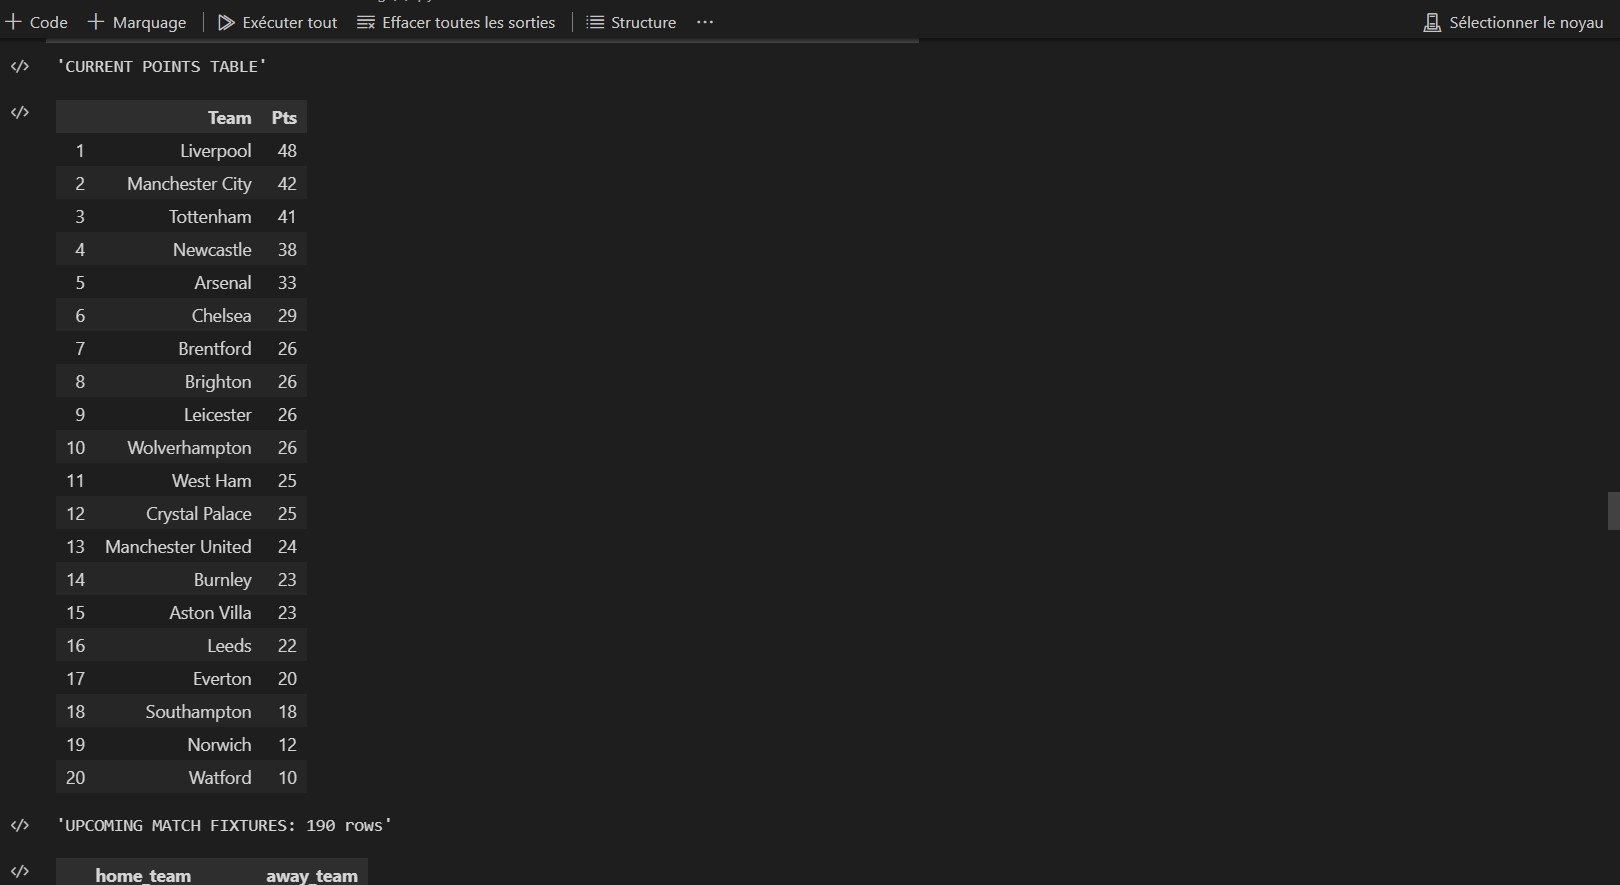

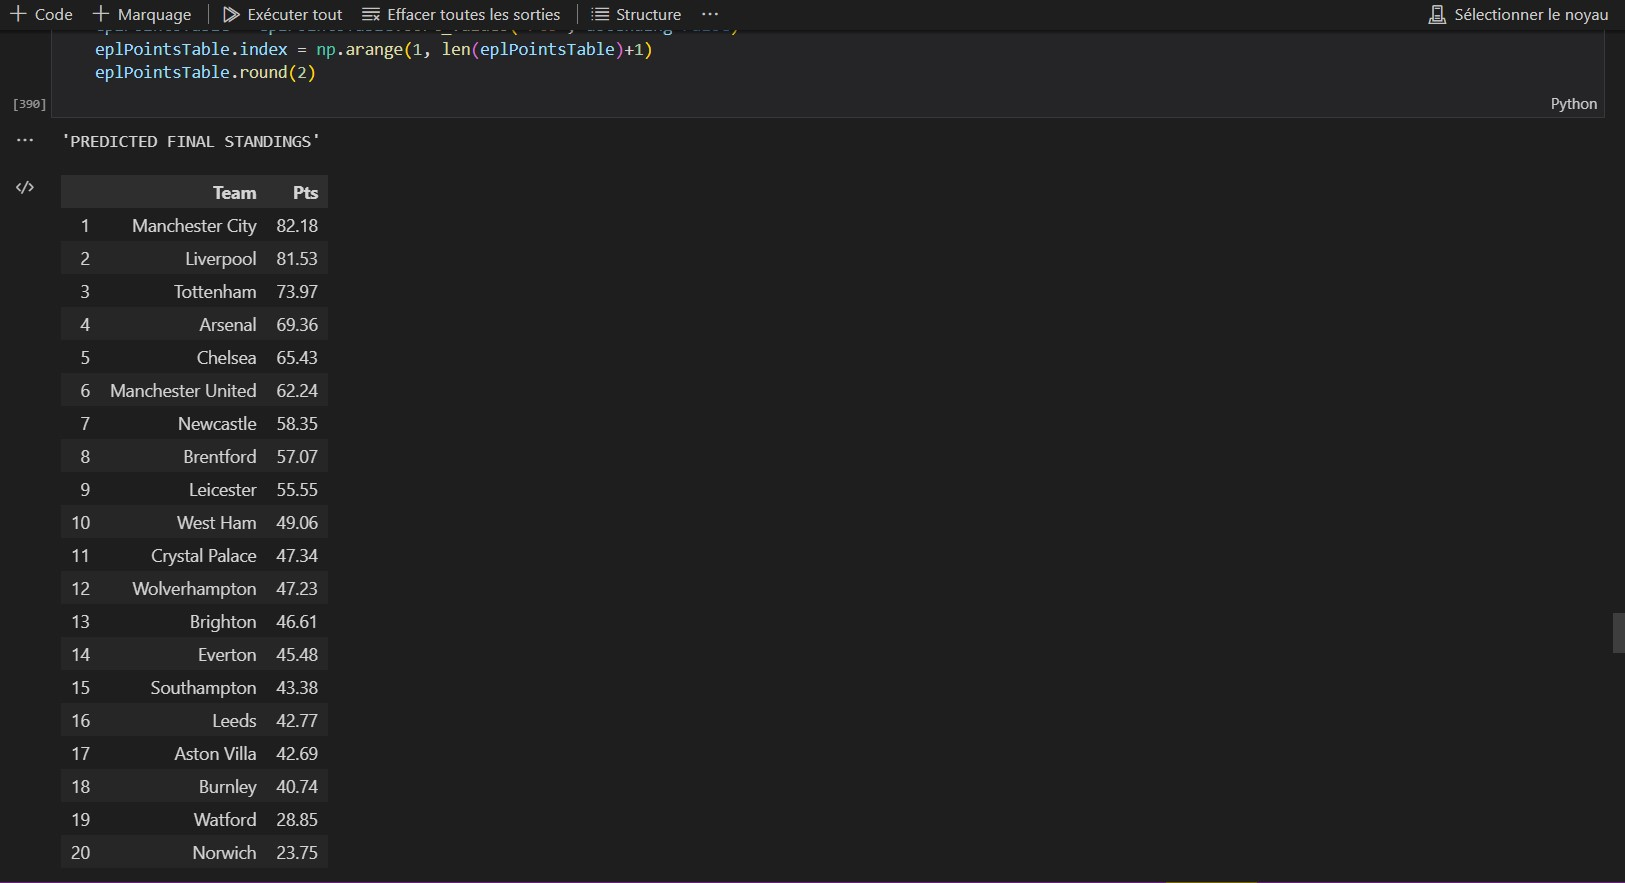

In [36]:
'''To evaluate the model, 
we need to import necessary libraries and define functions
for log-likelihood, mean absolute error, and root mean squared error. '''
import numpy as np
from scipy.stats import poisson
# Define a function for log-likelihood
def log_likelihood(actual_scores, expected_scores):
    ll = np.sum(poisson.logpmf(actual_scores, expected_scores))
    return ll
# Define a function for mean absolute error
def mean_absolute_error(actual_scores, expected_scores):
    mae = np.mean(np.abs(actual_scores - expected_scores))
    return mae
# Define a function for root mean squared error
def root_mean_squared_error(actual_scores, expected_scores):
    rmse = np.sqrt(np.mean((actual_scores - expected_scores)**2))
    return rmse

# Now, we can use the defined functions to evaluate the Poisson model
# Let's assume we have actual scores and expected scores as numpy arrays
actual_scores = np.array([82.18,81.53,73.97,69.36,65.43,62.24,58.35,57.07,55.55,49.06,47.34,47.23,46.61,45.48,43.38,42.77,42.69,40.74,28.85,23.75])
expected_scores = np.array([93,92,74,71,69,58,56,52,51,51,49,48,46,45,40,39,38,35,23,22])
# Calculate log-likelihood
ll = log_likelihood(actual_scores, expected_scores)
print("Log-likelihood:", ll)
# Calculate mean absolute error
mae = mean_absolute_error(actual_scores, expected_scores)
print("Mean Absolute Error:", mae)
# Calculate root mean squared error
rmse = root_mean_squared_error(actual_scores, expected_scores)
print("Root Mean Squared Error:", rmse)


'To evaluate the model, \nwe need to import necessary libraries and define functions\nfor log-likelihood, mean absolute error, and root mean squared error. '

Log-likelihood: -inf
Mean Absolute Error: 3.6689999999999996
Root Mean Squared Error: 4.677696014065043
